# How does the loss develop during training?

In [1]:
from transnormer.visualization.visualize import plot_loss
import json
import pandas as pd
from typing import Tuple

In [2]:
def get_stats_dfs(path: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """ Read train and eval stats into DataFrames from a `trainer_state.json` file"""
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)

    # Get epoch and loss from "log_history" within trainer_state.json
    df = pd.DataFrame.from_dict(data["log_history"])
    # loss (eval_loss) occurs only in entries referring to the performance 
    # on the train (eval) set
    train_df = df[df["loss"].notna()]
    eval_df = df[df["eval_loss"].notna()]

    return train_df, eval_df


## Loss for model `2023-02-14_12-29`

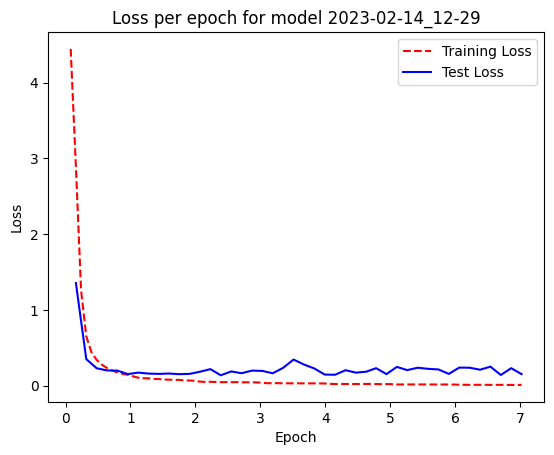

In [3]:

path = "/home/bracke/code/transnormer-old/models/models_2023-02-14_12-29/checkpoint-44000/trainer_state.json"

train_df, eval_df = get_stats_dfs(path)

plot_loss(loss_train=train_df["loss"], 
          loss_test=eval_df["eval_loss"], 
          epochs_train=train_df["epoch"], 
          epochs_test=eval_df["epoch"],
          title=f"Loss per epoch for model 2023-02-14_12-29"
          )

